### package load

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind

In [1]:
# 데이터 불러오기
data = pd.read_csv('data_fin.csv')
data["judge"] = data["judge"].map(lambda x : 0 if x == "양품" else 1)

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from 

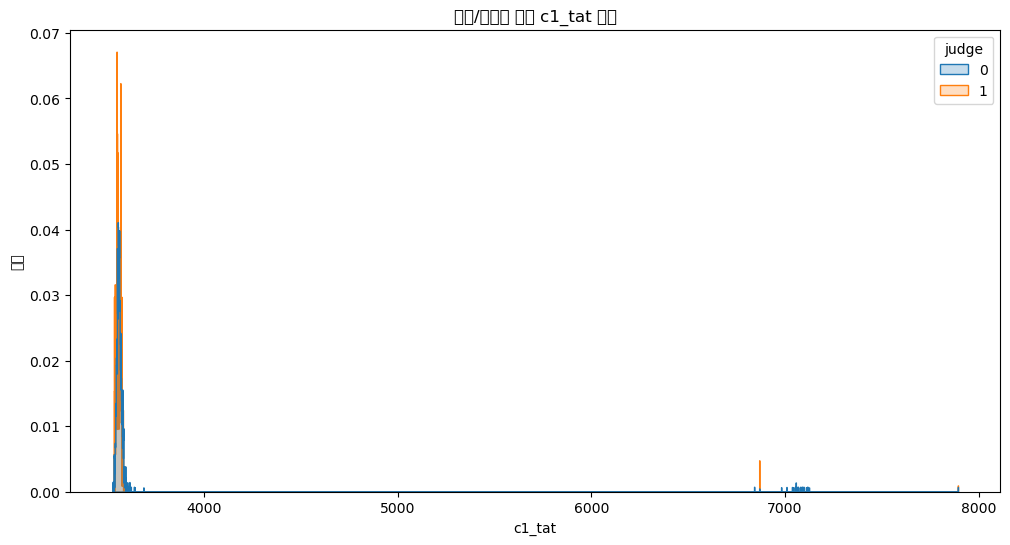

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           judge_binary   No. Observations:                31019
Model:                          Logit   Df Residuals:                    31017
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 Jun 2024   Pseudo R-squ.:                     inf
Time:                        23:56:49   Log-Likelihood:            -1.3528e-11
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.8810   7.22e+07  -3.17e-07      1.000   -1.42e+08    1.42e+08
c1_tat        -0.0035   2.03e+04  -1.72e-07      1.000   -3.98e+0

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\SU_HYUN

In [2]:
# 'judge'를 이진 변수로 변환하여 분석에 사용
data['judge_binary'] = data['judge'].apply(lambda x: 1 if x == '불량' else 0)

# 'c1_tat' 값의 분포를 판정 결과에 따라 시각화
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='c1_tat', hue='judge', element='step', stat='density', common_norm=False)
plt.title('양품/불량에 따른 c1_tat 분포')
plt.xlabel('c1_tat')
plt.ylabel('밀도')
plt.show()

# 로지스틱 회귀분석을 위한 데이터 준비
X = data[['c1_tat']]
y = data['judge_binary']

# 모델에 상수(intercept)를 추가
X = sm.add_constant(X)

# 로지스틱 회귀모델을 적합
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# 로지스틱 회귀분석 결과를 출력
print(result.summary())


In [3]:
# c1_tat를 표준화
scaler = StandardScaler()
data['c1_tat_scaled'] = scaler.fit_transform(data[['c1_tat']])

# 표준화된 데이터를 사용하여 로지스틱 회귀분석을 수행
X = data[['c1_tat_scaled']]
y = data['judge_binary']
X = sm.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# 로지스틱 회귀분석 결과 출력
print(result.summary())


         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           judge_binary   No. Observations:                31019
Model:                          Logit   Df Residuals:                    31017
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 Jun 2024   Pseudo R-squ.:                     inf
Time:                        23:59:40   Log-Likelihood:            -1.1095e-07
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -26.3565   3002.161     -0.009      0.993   -5910.484    5857.771
c1_tat_scaled -5.229e-13   3002.161  -1.74e-16      1.00

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\SU_HYUN

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51656 (\N{HANGUL SYLLABLE JIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYU

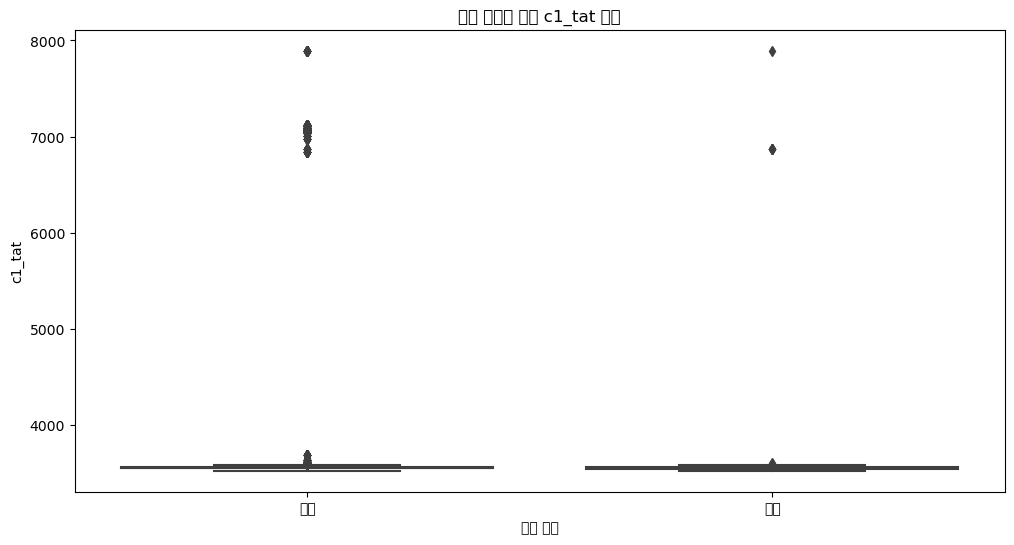

(5.39985702652773, 7.976334015597247e-08)

In [8]:
# 데이터 불러오기
data = pd.read_csv('data_fin.csv')

# 분석을 위한 관련 열 추출
relevant_data = data[['c1_tat', 'judge']]

# 관련 열에서 결측값 확인
relevant_data.isnull().sum()

# 품질 판정에 따른 c1_tat의 분포를 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(data=relevant_data, x='judge', y='c1_tat')
plt.title('품질 판정에 따른 c1_tat 분포')
plt.xlabel('품질 판정')
plt.ylabel('c1_tat')
plt.show()

# 품질 판정에 따라 c1_tat 값을 분리
c1_tat_good = relevant_data[relevant_data['judge'] == '양품']['c1_tat']
c1_tat_bad = relevant_data[relevant_data['judge'] == '불량']['c1_tat']

# t-검정 수행
t_stat, p_value = ttest_ind(c1_tat_good, c1_tat_bad, equal_var=False)

# t-검정 결과 출력
t_stat, p_value
